# 🏠 Local Training: YOLOv8 (Cost Saving Mode)
**Project:** PPE Detection

Instead of launching an EC2 instance on SageMaker, we will train the model directly on the local machine. This is ideal for:
1.  **Debugging:** Fast iteration cycles.
2.  **Cost:** Zero cloud spending.
3.  **Simplicity:** No need to manage Docker containers or S3 uploads for training data.

### Prerequisites
* Local GPU is highly recommended (NVIDIA CUDA).

## Path Configuration
YOLO requires a `data.yaml` file pointing to the images.

In [3]:
import os
import yaml

dataset_root = os.path.abspath('../../data/raw/ppe')
yaml_path = os.path.join(dataset_root, 'data.yaml')

print(f"Dataset root: {dataset_root}")
with open(yaml_path, 'r') as f:
    data_config = yaml.safe_load(f)

data_config['path'] = dataset_root
data_config['train'] = 'train/images'
data_config['val'] = 'valid/images'
data_config['test'] = 'test/images'

# Save the fixed YAML
fixed_yaml_path = os.path.join(dataset_root, 'data_local.yaml')
with open(fixed_yaml_path, 'w') as f:
    yaml.dump(data_config, f)

print(f"Configuration saved to: {fixed_yaml_path}")
print("--- YAML Content ---")
print(yaml.dump(data_config))

Dataset root: f:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe
Configuration saved to: f:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe\data_local.yaml
--- YAML Content ---
names:
- Excavator
- Gloves
- Hardhat
- Ladder
- Mask
- NO-Hardhat
- NO-Mask
- NO-Safety Vest
- Person
- SUV
- Safety Cone
- Safety Vest
- bus
- dump truck
- fire hydrant
- machinery
- mini-van
- sedan
- semi
- trailer
- truck
- truck and trailer
- van
- vehicle
- wheel loader
nc: 25
path: f:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe
roboflow:
  license: CC BY 4.0
  project: construction-site-safety
  url: https://universe.roboflow.com/roboflow-universe-projects/construction-site-safety/dataset/30
  version: 30
  workspace: roboflow-universe-projects
test: test/images
train: train/images
val: valid/images



## Start Training 🏋️
We use the Nano model (`yolov8n.pt`) which is the lightest and fastest.

In [4]:
from ultralytics import YOLO
import torch

In [ ]:

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"

# Check for GPU
device = '0' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device.upper()}")

# Load a model
model = YOLO('yolov8n.pt')

# Train the model
results = model.train(
    data=fixed_yaml_path,
    epochs=20,
    imgsz=640,
    batch=8,
    workers=0,
    device=device,
    project='../../models',
    name='yolo_ppe_v1',
    exist_ok=True, 
    plots=True
)

Using device: 0
Ultralytics 8.3.232  Python-3.12.10 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16379MiB)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=f:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe\data_local.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=yolo_ppe_v1, nbs=64, nms=False, opset=None, optimize=False, optimizer=aut

f:\Pessoal\aws-sagemaker-cv-pipeline\venv\Lib\site-packages\torch\nn\modules\module.py:1355: UserWarning: expandable_segments not supported on this platform (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\pytorch\c10/cuda/CUDAAllocatorConfig.h:35.)
  return t.to(


AMP: checks passed 
train: Fast image access  (ping: 0.10.0 ms, read: 406.5245.1 MB/s, size: 85.1 KB)
train: Scanning F:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe\train\labels.cache... 521 images, 34 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 521/521 521.9Kit/s 0.0s
val: Fast image access  (ping: 0.10.0 ms, read: 296.2139.9 MB/s, size: 109.5 KB)
val: Scanning F:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe\valid\labels.cache... 114 images, 10 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 114/114 45.3Kit/s 0.0s
Plotting labels to F:\Pessoal\aws-sagemaker-cv-pipeline\models\yolo_ppe_v1\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000345, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to F:\Pessoal\aws-sagemaker-cv-pipeli

## Validation & Export
Now that the model is trained, let's locate the best weights and test it on a sample image.

Best model saved at: ../../models/yolo_ppe_v1/weights/best.pt
Testing on: f:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe\valid\images\-1079-_png_jpg.rf.77459a818bed5a44927d46bdb976c661.jpg

image 1/1 f:\Pessoal\aws-sagemaker-cv-pipeline\data\raw\ppe\valid\images\-1079-_png_jpg.rf.77459a818bed5a44927d46bdb976c661.jpg: 640x640 2 Hardhats, 2 Persons, 8.7ms
Speed: 2.3ms preprocess, 8.7ms inference, 3.8ms postprocess per image at shape (1, 3, 640, 640)


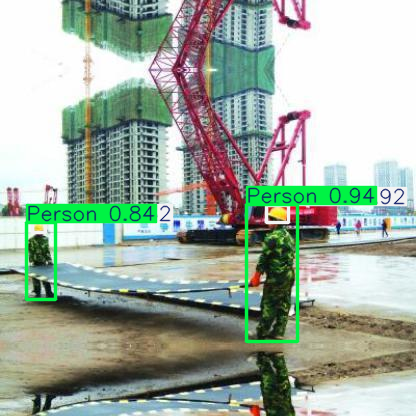

In [6]:
from PIL import Image
import glob
best_model_path = '../../models/yolo_ppe_v1/weights/best.pt'
print(f"Best model saved at: {best_model_path}")
custom_model = YOLO(best_model_path)
val_images = glob.glob(os.path.join(dataset_root, 'valid', 'images', '*.jpg'))
test_image = val_images[0] if val_images else None

if test_image:
    print(f"Testing on: {test_image}")
    
    # Run prediction
    results = custom_model.predict(test_image, conf=0.5)
    
    # Show result
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
        display(im)
else:
    print("No validation images found to test.")

## Upload best weights to s3

In [15]:
## Compress the best model into a tar.gz file for SageMaker deployment
import tarfile
local_best_pt = os.path.abspath('../../models/yolo_ppe_v1/weights/best.pt')
output_tar = 'model.tar.gz'

print(f"Zipping '{local_best_pt}' to '{output_tar}'...")

if not os.path.exists(local_best_pt):
    raise FileNotFoundError(f"Model not found at: {local_best_pt}")

with tarfile.open(output_tar, "w:gz") as tar:
    tar.add(local_best_pt, arcname='model.pt')

print("Compression completed.")

Zipping 'f:\Pessoal\aws-sagemaker-cv-pipeline\models\yolo_ppe_v1\weights\best.pt' to 'model.tar.gz'...
Compression completed.


In [10]:
import sagemaker
import boto3

boto_session = boto3.Session(profile_name='pessoal', region_name='us-east-1')
bucket_name = 'sagemaker-portfolio-cv-aws' 
sess = sagemaker.Session(boto_session=boto_session, default_bucket=bucket_name)
region = sess.boto_region_name

print(f"Region: {region}")
print(f"Target Bucket: {bucket_name}")

Region: us-east-1
Target Bucket: sagemaker-portfolio-cv-aws


In [11]:
import sys
import os

BASE_DIR = os.path.abspath(os.path.join(os.getcwd(), ".."))
if BASE_DIR not in sys.path:
    sys.path.append(BASE_DIR)

In [12]:
from utils.bucket import create_bucket_if_not_exists

s3_client = boto_session.client('s3', region_name=region)
create_bucket_if_not_exists(s3_client, bucket_name, region)

✅ Bucket 'sagemaker-portfolio-cv-aws' criado/verificado com sucesso.


In [22]:
import importlib
importlib.reload(sys.modules['utils.bucket'])

<module 'utils.bucket' from 'f:\\Pessoal\\aws-sagemaker-cv-pipeline\\notebooks\\utils\\bucket.py'>

In [26]:
from utils.bucket import upload_file_to_s3

s3_model_key = 'models/ppe/yolo_v1/model.tar.gz'
s3_model_uri = upload_file_to_s3(sess, output_tar, bucket_name, s3_model_key)
print(f"Model uploaded to: {s3_model_uri}")

Iniciando upload de 'model.tar.gz' para 's3://sagemaker-portfolio-cv-aws/models/ppe/yolo_v1/model.tar.gz'
Upload finalizado! Arquivo enviado para: s3://sagemaker-portfolio-cv-aws/models/ppe/yolo_v1/model.tar.gz
Model uploaded to: s3://sagemaker-portfolio-cv-aws/models/ppe/yolo_v1/model.tar.gz


In [14]:
from utils.bucket import upload_to_s3

prefix = "models/ppe/yolo_v1/"

local_dataset_path = '../../models/yolo_ppe_v1/'

s3_data_uri = upload_to_s3(sess, local_dataset_path, bucket_name, prefix)

print(f"Data loaded to: {s3_data_uri}. IMPORTANT: Check if the data was correctly uploaded to the S3 bucket.")
print("Upload completed.")

Iniciando upload de '../../models/yolo_ppe_v1/' para 's3://sagemaker-portfolio-cv-aws/models/ppe/yolo_v1/'
Upload finalizado! 8 arquivos enviados.
Data loaded to: s3://sagemaker-portfolio-cv-aws/models/ppe/yolo_v1/. IMPORTANT: Check if the data was correctly uploaded to the S3 bucket.
Upload completed.
